### Rips and alpha complexes from matrix of pairwise distances

In [1]:

import numpy as np
import pickle as pck
import pandas as pd
import matplotlib.pyplot as plt
import gudhi as gd
from gudhi.representations.preprocessing import BirthPersistenceTransform
from gudhi.representations import PersistenceImage
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import pairwise_distances
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
#from xgboost import XGBClassifier
import os

from multiplier import *

In [2]:
# Define the paths to the files
path_file = "./ECG5000/"
train_file = "ECG5000_TRAIN.tsv"
test_file = "ECG5000_TEST.tsv"
labels_file = "labels.txt"

# Load the training set, test set, and labels file
train_data = pd.read_csv(path_file + train_file, sep="\t", header=None)
test_data = pd.read_csv(path_file + test_file, sep="\t", header=None)

corr_list = []

train_corr = train_data.corr()
test_corr = test_data.corr()
corr_list.append(train_corr)
corr_list.append(test_corr)

In [3]:
dist_list = [1 - np.abs(c) for c in corr_list]

D = dist_list[0]
D.head()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,0.000000,0.943493,0.663478,0.498385,0.432121,0.428474,0.575482,0.934709,0.803339,0.743045,...,0.556513,0.472588,0.424834,0.409874,0.400436,0.398267,0.401109,0.428448,0.444069,0.785587
1,0.943493,0.000000,0.187304,0.452189,0.626107,0.840386,0.960968,0.872368,0.878200,0.760209,...,0.687738,0.757978,0.846778,0.900473,0.944858,0.994050,0.992302,0.996722,0.998211,0.822708
2,0.663478,0.187304,0.000000,0.107494,0.256793,0.488291,0.822056,0.843070,0.727698,0.569512,...,0.450999,0.468076,0.531946,0.568491,0.607712,0.665079,0.678395,0.668555,0.638379,0.941785
3,0.498385,0.452189,0.107494,0.000000,0.056157,0.214790,0.547344,0.998387,0.762424,0.576811,...,0.345378,0.319391,0.343337,0.351779,0.376042,0.416956,0.430918,0.431932,0.413033,0.910592
4,0.432121,0.626107,0.256793,0.056157,0.000000,0.076139,0.349599,0.826093,0.857383,0.658377,...,0.334653,0.287206,0.283303,0.280132,0.292229,0.319060,0.332179,0.340912,0.329016,0.796027


In [4]:

skeleton = gd.RipsComplex(
    distance_matrix = D.values, 
    max_edge_length = 0.8
) 


Rips_simplex_tree = skeleton.create_simplex_tree(max_dimension = 2)
Rips_simplex_tree.dimension()
Rips_simplex_tree.num_vertices()
Rips_simplex_tree.num_simplices()

rips_filtration = Rips_simplex_tree.get_filtration()
rips_list = list(rips_filtration)
len(rips_list)


for splx in rips_list[0:400] :
    print(splx)

([0], 0.0)
([1], 0.0)
([2], 0.0)
([3], 0.0)
([4], 0.0)
([5], 0.0)
([6], 0.0)
([7], 0.0)
([8], 0.0)
([9], 0.0)
([10], 0.0)
([11], 0.0)
([12], 0.0)
([13], 0.0)
([14], 0.0)
([15], 0.0)
([16], 0.0)
([17], 0.0)
([18], 0.0)
([19], 0.0)
([20], 0.0)
([21], 0.0)
([22], 0.0)
([23], 0.0)
([24], 0.0)
([25], 0.0)
([26], 0.0)
([27], 0.0)
([28], 0.0)
([29], 0.0)
([30], 0.0)
([31], 0.0)
([32], 0.0)
([33], 0.0)
([34], 0.0)
([35], 0.0)
([36], 0.0)
([37], 0.0)
([38], 0.0)
([39], 0.0)
([40], 0.0)
([41], 0.0)
([42], 0.0)
([43], 0.0)
([44], 0.0)
([45], 0.0)
([46], 0.0)
([47], 0.0)
([48], 0.0)
([49], 0.0)
([50], 0.0)
([51], 0.0)
([52], 0.0)
([53], 0.0)
([54], 0.0)
([55], 0.0)
([56], 0.0)
([57], 0.0)
([58], 0.0)
([59], 0.0)
([60], 0.0)
([61], 0.0)
([62], 0.0)
([63], 0.0)
([64], 0.0)
([65], 0.0)
([66], 0.0)
([67], 0.0)
([68], 0.0)
([69], 0.0)
([70], 0.0)
([71], 0.0)
([72], 0.0)
([73], 0.0)
([74], 0.0)
([75], 0.0)
([76], 0.0)
([77], 0.0)
([78], 0.0)
([79], 0.0)
([80], 0.0)
([81], 0.0)
([82], 0.0)
([83], 0.0)
([

In [5]:
from sklearn.manifold import MDS
 
embedding = MDS(n_components = 3, dissimilarity = 'precomputed')
X_transformed = embedding.fit_transform(D)
X_transformed.shape

/opt/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


(141, 3)

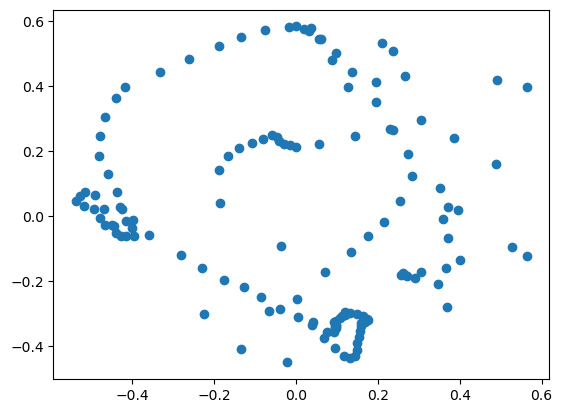

In [6]:
fig = plt.figure()
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], label = 'MDS');

In [7]:
alpha_complex = gd.AlphaComplex(points = X_transformed)

st_alpha = alpha_complex.create_simplex_tree()

st_alpha.dimension()

print(st_alpha.num_vertices())

print(st_alpha.num_simplices())

141
3451


### Persistent homology and persistence diagrams

In [8]:

skeleton_0 = gd.RipsComplex(
    distance_matrix = D.values, 
    max_edge_length = 0.8
) 

Rips_simplex_tree = skeleton_0.create_simplex_tree(max_dimension = 2)

BarCodes_Rips = Rips_simplex_tree.persistence()

BarCodes_Rips_0 = Rips_simplex_tree.persistence_intervals_in_dimension(0)
BarCodes_Rips_1 = Rips_simplex_tree.persistence_intervals_in_dimension(1)



/opt/anaconda3/lib/python3.11/site-packages/gudhi/persistence_graphical_tools.py:105: UserWarning: This function is not available.
ModuleNotFoundError: No module named 'matplotlib'.
  warnings.warn(f"This function is not available.\nModuleNotFoundError: No module named '{import_error.name}'.")


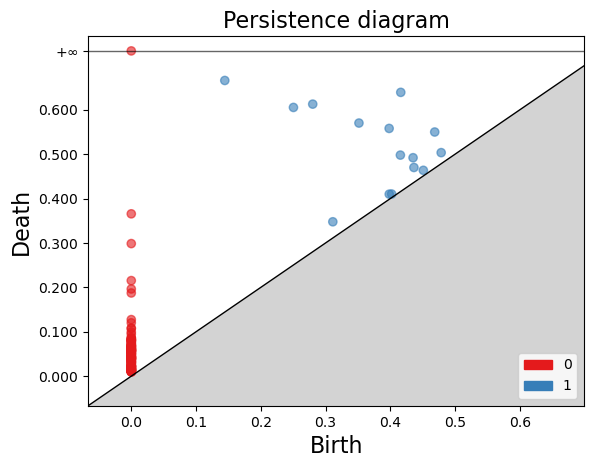

In [9]:
gd.plot_persistence_diagram(BarCodes_Rips);

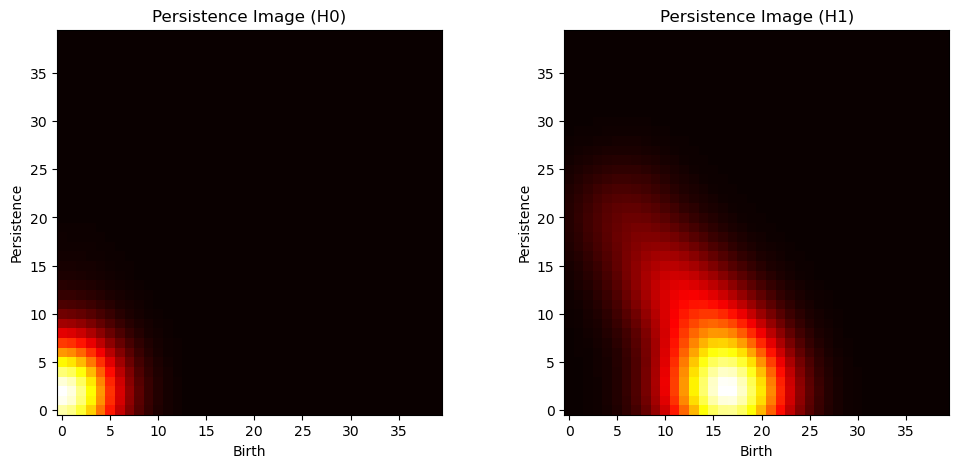

In [10]:
# create the persistence images
persistence_image = PersistenceImage(bandwidth=0.1, im_range=[0, 1, 0, 1], resolution=[40, 40])

persistence_image_H0 = persistence_image.fit_transform([BarCodes_Rips_0])[0]
persistence_image_H1 = persistence_image.fit_transform([BarCodes_Rips_1])[0]

resolution = [40, 40]
persistence_image_H0_mat = persistence_image_H0.reshape(resolution)
persistence_image_H1_mat = persistence_image_H1.reshape(resolution)


fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].imshow(persistence_image_H0_mat, cmap='hot', origin='lower')
axs[0].set_title('Persistence Image (H0)')
axs[0].set_xlabel('Birth')
axs[0].set_ylabel('Persistence')

axs[1].imshow(persistence_image_H1_mat, cmap='hot', origin='lower')
axs[1].set_title('Persistence Image (H1)')
axs[1].set_xlabel('Birth')
axs[1].set_ylabel('Persistence')

plt.show()


In [11]:
# sklearn imports
from sklearn.datasets import *
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.inspection import DecisionBoundaryDisplay

# Perform SVM on the Persistence Images

def kernel_comparison(X, y, support_vectors=True, tight_box=False, if_flag=False, gamma=3, degree=3, height=0, width=0):

    X_train, X_test, y_train, y_test = train_test_split(X, y)

    fig = plt.figure(figsize=(10,3))

    data= []
    
    for ikernel, kernel in enumerate(['linear', 'poly', 'rbf', 'sigmoid']):

        # Train the SVC
        clf = SVC(kernel=kernel, degree=3, gamma=3).fit(X_train, y_train)
        prediction = clf.predict(X_test)
        accuracy = accuracy_score(y_test, prediction)
        data.append(accuracy)
    
        # Settings for plotting
        ax = plt.subplot(1,4,1+ikernel)
        if if_flag:
            x_min, x_max, y_min, y_max = -3, 3, -3, 3
            ax.set(xlim=(x_min, x_max), ylim=(y_min, y_max))
    
        # Plot decision boundary and margins
        common_params = {"estimator": clf, "X": X, "ax": ax}
        DecisionBoundaryDisplay.from_estimator(
            **common_params,
            response_method="predict",
            plot_method="pcolormesh",
            alpha=0.3,
        )
        DecisionBoundaryDisplay.from_estimator(
            **common_params,
            response_method="decision_function",
            plot_method="contour",
            levels=[-1, 0, 1],
            colors=["k", "k", "k"],
            linestyles=["--", "-", "--"],
        )
    
        if support_vectors:
            # Plot bigger circles around samples that serve as support vectors
            ax.scatter(
                clf.support_vectors_[:, 0],
                clf.support_vectors_[:, 1],
                s=150,
                facecolors="none",
                edgecolors="k",
            )
    
        # Plot samples by color and add legend
        ax.scatter(X[:, 0], X[:, 1], c=y, s=30, edgecolors="k")
        ax.set_title(kernel)
        ax.axis('off')
        if tight_box:
            ax.set_xlim([X[:, 0].min(), X[:, 0].max()])
            ax.set_ylim([X[:, 1].min(), X[:, 1].max()])

    linear = data[0]
    poly = data[1]
    rbf = data[2]
    sigmoid = data[3]

    d = [["accuracy", linear, poly, rbf, sigmoid]]
        
    table = tb.tabulate(d, headers=["data", "linear", "poly", "rbf", "sigmoid"])   
    print(table)